<a href="https://colab.research.google.com/github/SorayaFrancoLopez/NN_churn_proyect_insurance/blob/main/STEP3_Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
def evaluacion(y_true, y_pred, y_pred_proba):
    """
    Realiza operaciones de métricas de evaluación sobre los resultados del entrenamiento.

    Parámetros:
        - y_true: Etiquetas verdaderas.
        - y_pred: Etiquetas predichas.
        - y_pred_proba: Probabilidades predichas.

    Retorna:
        - Accuracy del modelo
        - Precision_score
        - Recall_score
        - F1_score
        - Matriz de confusión
        - Calculo de ROC-AUC
        - Gráficas de métricas:
            * Curva ROC
            * Curva de precisión
            * Matriz de Confusión
            * Histograma de Probabilidad
    """

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    # Precisión
    precision = precision_score(y_true, y_pred)
    print("Precision:", precision)

    # Recall
    recall = recall_score(y_true, y_pred)
    print("Recall:", recall)

    # F1-score
    f1 = f1_score(y_true, y_pred)
    print("F1-score:", f1)

    # Matriz de Confusión
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calcula la ROC-AUC
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print("ROC-AUC Score:", roc_auc)

    # Calcula la curva ROC.
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

    # Calcula la curva de precisión y recuperación
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)

    # Gráficos
    plt.figure(figsize=(7, 7))

    # Curva ROC
    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")

    # Curva de precisión y recuperación
    plt.subplot(2, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    # Matriz de confusión
    plt.subplot(2, 2, 3)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Matriz de Confusión')

    # Histograma de probabilidades predichas
    plt.subplot(2, 2, 4)
    plt.hist(y_pred_proba, bins=20, color='orange', alpha=0.7)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Histograma de probabilidades')
    plt.tight_layout()
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Churn Rate Algorithm/dfclean.csv", delimiter=',', encoding='latin1')

In [ ]:
columnas_seleccionadas = ['PrimasPagadas_Menos1', 'Edad', 'PrimasPagadas_Menos2',
                       'sCodPostal', 'PrimasPagadas_Menos3', 'Num_Pol_Vigor_Menos1',
                       'AnosCliente', 'SEXO', 'Num_Pol_Vigor_Menos2', 'Num_Pol_Vigor_Menos3',
                       'sNomEstadoCivil', 'NumeRecibos_Menos1','target']

df = df.drop(columns=df.columns.difference(columnas_seleccionadas))

In [ ]:
df.shape

(16178, 13)

In [ ]:
# Dividir
X = df.drop(columns=['target'])
y = df['target']

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide los datos normalizados en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializa, entrena y predice
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

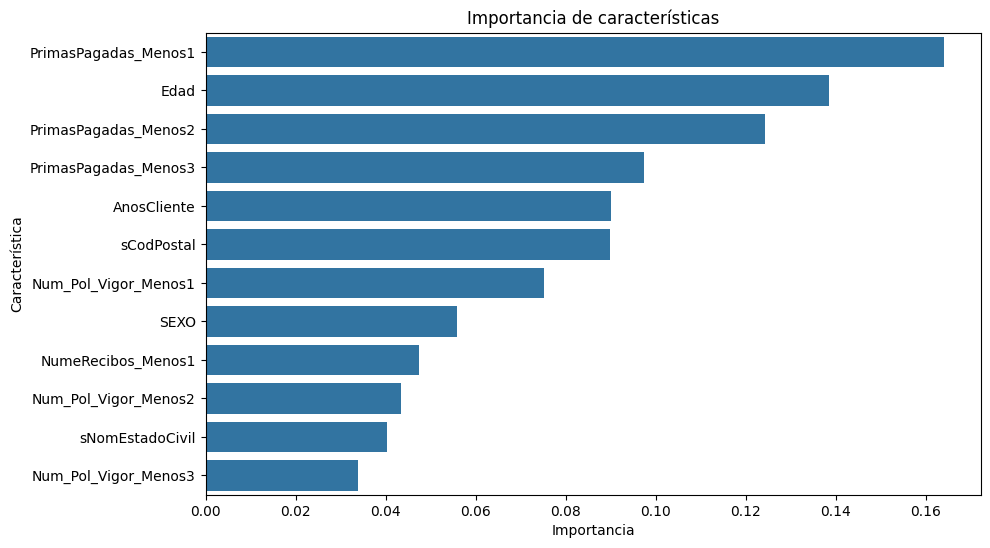

In [ ]:
#Creamos feature_importance, su dataframe, lo ordenamos y visualizamos.
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [ ]:
feature_importance_df.head(12)

,Feature,Importance
7,PrimasPagadas_Menos1,0.163908
0,Edad,0.138526
9,PrimasPagadas_Menos2,0.124176
11,PrimasPagadas_Menos3,0.097294
1,AnosCliente,0.090144
2,sCodPostal,0.089808
5,Num_Pol_Vigor_Menos1,0.075141
4,SEXO,0.055817
6,NumeRecibos_Menos1,0.047483
8,Num_Pol_Vigor_Menos2,0.043460


In [ ]:
import joblib

joblib.dump(clf, 'modelo_clientes.pkl')

['modelo_clientes.pkl']

In [ ]:
# Cargar el modelo
clf = joblib.load('modelo_clientes.pkl')
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [ ]:
df.head()

,Edad,AnosCliente,sCodPostal,sNomEstadoCivil,SEXO,Num_Pol_Vigor_Menos1,NumeRecibos_Menos1,PrimasPagadas_Menos1,Num_Pol_Vigor_Menos2,PrimasPagadas_Menos2,Num_Pol_Vigor_Menos3,PrimasPagadas_Menos3,target
0,59,16.0,28,1,1,1,1,113.87,1,113.87,1,112.42,False
1,70,5.0,8,2,1,1,5,874.22,1,627.63,1,139.15,False
2,60,6.0,17,1,1,1,0,0.00,1,0.00,1,0.00,False
3,58,5.0,8,2,1,1,1,438.45,1,429.61,1,392.12,False
4,72,6.0,29,4,1,1,1,234.30,2,438.45,2,426.60,True


In [ ]:
# Cargar el modelo
clf = joblib.load('modelo_clientes.pkl')

# Utilizar el modelo para hacer predicciones
y_pred = clf.predict(X_test_2)
y_pred_proba = clf.predict_proba(X_test_2)[:, 1]

# Imprimir las predicciones
print("Predicciones:", y_pred)
print("Probabilidades de predicción:", y_pred_proba)

Predicciones: [False]
Probabilidades de predicción: [0.2]


In [ ]:
# Filtrar el DataFrame para mostrar solo las filas donde target es True
df_true = df[df['target'] == True]

df_true.head()

,Edad,AnosCliente,sCodPostal,sNomEstadoCivil,SEXO,Num_Pol_Vigor_Menos1,NumeRecibos_Menos1,PrimasPagadas_Menos1,Num_Pol_Vigor_Menos2,PrimasPagadas_Menos2,Num_Pol_Vigor_Menos3,PrimasPagadas_Menos3,target
4,72,6.0,29,4,1,1,1,234.30,2,438.45,2,426.60,True
5,69,7.0,8,4,1,1,2,452.65,1,209.76,1,424.53,True
12,41,6.0,17,4,1,4,16,3734.28,0,0.00,0,382.92,True
30,37,3.0,8,2,1,1,1,373.72,0,0.00,0,0.00,True
33,57,4.0,46,2,1,1,4,201.71,1,143.89,0,0.00,True


In [ ]:
import joblib
import numpy as np

# Ejemplos de datos de prueba
X_tests = [
    np.array([[72, 6.0, 29, 4, 1, 1, 1, 234.30, 2, 438.45, 2, 426.60]]),
    np.array([[55, 3.5, 35, 2, 0, 0, 1, 150.20, 1, 200.35, 0, 190.50]]),
    np.array([[45, 8.0, 18, 1, 0, 1, 0, 180.60, 0, 0, 0, 0]]),
    np.array([[30, 2.0, 22, 3, 1, 0, 1, 120.40, 0, 0, 0, 0]]),
    np.array([[65, 10.0, 40, 2, 1, 1, 1, 300.80, 3, 700.20, 2, 690.10]])
]

# Cargar el modelo
clf = joblib.load('modelo_clientes.pkl')

# Predicciones para cada conjunto de datos de prueba
for i, X_test in enumerate(X_tests):
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    print(f"Predicciones para Ejemplo {i+1}: {y_pred}")
    print(f"Probabilidades de predicción para Ejemplo {i+1}: {y_pred_proba}")


Predicciones para Ejemplo 1: [False]
Probabilidades de predicción para Ejemplo 1: [0.11]
Predicciones para Ejemplo 2: [False]
Probabilidades de predicción para Ejemplo 2: [0.2]
Predicciones para Ejemplo 3: [False]
Probabilidades de predicción para Ejemplo 3: [0.15]
Predicciones para Ejemplo 4: [False]
Probabilidades de predicción para Ejemplo 4: [0.2]
Predicciones para Ejemplo 5: [False]
Probabilidades de predicción para Ejemplo 5: [0.16]


In [ ]:
import joblib
import numpy as np

# Ejemplos de datos de prueba
X_tests = [
    np.array([[72, 6.0, 29, 4, 1, 1, 1, 234.30, 2, 438.45, 2, 426.60]]),
    np.array([[55, 3.5, 35, 2, 0, 0, 1, 150.20, 1, 200.35, 0, 190.50]]),
    np.array([[45, 8.0, 18, 1, 0, 1, 0, 180.60, 0, 0, 0, 0]]),
    np.array([[30, 2.0, 22, 3, 1, 0, 1, 120.40, 0, 0, 0, 0]]),
    np.array([[65, 10.0, 40, 2, 1, 1, 1, 300.80, 3, 700.20, 2, 690.10]])
]

# Cargar el modelo
clf = joblib.load('modelo_clientes.pkl')

# Predicciones para cada conjunto de datos de prueba
for i, X_test in enumerate(X_tests):
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    print(f"Predicciones para Ejemplo {i+1}: {y_pred}")
    print(f"Probabilidades de predicción para Ejemplo {i+1}: {y_pred_proba}")

Predicciones para Ejemplo 1: [False]
Probabilidades de predicción para Ejemplo 1: [0.11]
Predicciones para Ejemplo 2: [False]
Probabilidades de predicción para Ejemplo 2: [0.2]
Predicciones para Ejemplo 3: [False]
Probabilidades de predicción para Ejemplo 3: [0.15]
Predicciones para Ejemplo 4: [False]
Probabilidades de predicción para Ejemplo 4: [0.2]
Predicciones para Ejemplo 5: [False]
Probabilidades de predicción para Ejemplo 5: [0.16]
